In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load surrogate data
data_small = np.load('../../../data/probs_ns_8000_ns_gt_2097152.npz')
freq_in_training_dataset_surrogates = data_small['freq_in_training_dataset_surrogates']
numerical_prob_surrogates = data_small['numerical_prob_surrogates']
num_impossible_samples_surrogates = data_small['num_impossible_samples_surrogates']
surr_samples_freqs = data_small['surr_samples_freqs']

data_large = np.load('../../../data/generated_samples_probs_ns_8000_ns_gt_2097152.npz')
num_impossible_samples = data_large['num_impossible_samples']

In [3]:
# preprocess data

# theoretical probabilities of "possible" samples in both the original and the generated data.
# Note that all empirical frequencies and theoretical probabilities are always reported for the generated set (or the surrogate set below). In other words, there are no zeroes in sim_samples_freqs or in surr_samples_freqs.
possible_in_gen_and_orig = (data_small['numerical_prob']>0) & (data_small['freq_in_training_dataset']>0)
prob_log_possible_in_gen_and_orig = np.log10(data_small['numerical_prob'][possible_in_gen_and_orig])

# empirical probabilities of "possible" samples in original & generated wrt the original data
freq_log_possible_in_gen_and_orig_orig = np.log10(data_small['freq_in_training_dataset'][possible_in_gen_and_orig])

# theoretical probabilities and empirical probabilities of "possible" samples in the generated data, wrt the generated data
freq_log_possible_in_gen_and_orig_gen = np.log10(data_small['sim_samples_freqs'][possible_in_gen_and_orig])

# theoretical probabilities and empirical probabilities of "possible" samples *not present* the original, ground-truth data, but present in the surrogate data
possible_in_surrogate_and_not_in_orig = (numerical_prob_surrogates>0) & (freq_in_training_dataset_surrogates==0)
prob_log_possible_and_not_in_orig_surr = np.log10(numerical_prob_surrogates[possible_in_surrogate_and_not_in_orig])
freq_log_possible_and_not_in_orig_surr = np.log10(surr_samples_freqs[possible_in_surrogate_and_not_in_orig])

# theoretical probabilities and empirical probabilities of "possible" samples *not present* the original, ground-truth data, but present in the generated data
possible_in_generated_and_not_in_orig = (data_large['numerical_prob']>0) & (data_large['freq_in_training_dataset']==0)
prob_log_possible_and_not_in_orig_gen = np.log10(data_large['numerical_prob'][possible_in_generated_and_not_in_orig])
freq_log_possible_and_not_in_orig_gen = np.log10(data_large['sim_samples_freqs'][possible_in_generated_and_not_in_orig])

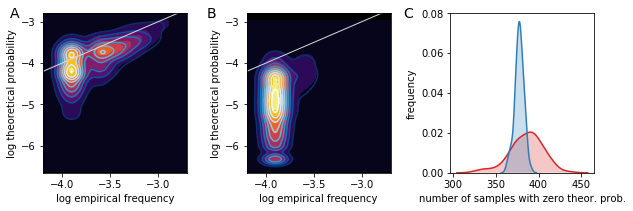

In [18]:
fig, ax = plt.subplots(figsize=(9,3), nrows=1, ncols=3)
ax = ax.reshape((-1,3))

sns.kdeplot(data=freq_log_possible_in_gen_and_orig_orig,
            data2=prob_log_possible_in_gen_and_orig,
            ax=ax[0,0], n_levels=10, bw=(0.1,0.1), shade=True, cmap="inferno")
ax[0,0].plot([-5,0], [-5,0], color='#d8dcd6', linewidth=1)
sns.kdeplot(data=freq_log_possible_in_gen_and_orig_gen,
            data2=prob_log_possible_in_gen_and_orig,
            ax=ax[0,0], n_levels=10, bw=(0.1,0.1), shade=False, cmap='Blues_r')

# subsample data to speed up plotting (set subsample=False to skip)
subsample = False
n_samples = 100
if subsample:
    r_surr = np.random.choice(np.arange(freq_log_possible_and_not_in_orig_surr.size), n_samples, replace=False)
    r_gen = np.random.choice(np.arange(freq_log_possible_and_not_in_orig_gen.size), n_samples, replace=False)
else:
    r_surr = np.arange(freq_log_possible_and_not_in_orig_surr.size)
    r_gen = np.arange(freq_log_possible_and_not_in_orig_gen.size)

sns.kdeplot(data=freq_log_possible_and_not_in_orig_surr[r_surr],
            data2=prob_log_possible_and_not_in_orig_surr[r_surr],
            ax=ax[0,1], n_levels=10, bw=(0.1,0.1), shade=True, cmap="inferno")
ax[0,1].plot([-5,0], [-5,0], color='#d8dcd6', linewidth=1)
sns.kdeplot(data=freq_log_possible_and_not_in_orig_gen[r_gen],
            data2=prob_log_possible_and_not_in_orig_gen[r_gen],
            ax=ax[0,1], n_levels=10, bw=(0.1,0.1), shade=False, cmap='Blues_r')

sns.kdeplot(data=num_impossible_samples_surrogates, ax=ax[0,2], shade=True, color=(0.85033448673587075, 0.14686658977316416, 0.13633217993079583))
sns.kdeplot(data=num_impossible_samples, ax=ax[0,2], shade=True, color=(0.1791464821222607, 0.49287197231833907, 0.7354248366013072))
ax[0,2].set_xlabel('number of samples with zero theor. prob.')
ax[0,2].set_ylabel('frequency')
ax[0,2].set_ylim([0, 0.08])


for a in ax[:,0:2].flat:
    a.set_facecolor('black')
    a.set_xlim((-4.2,-2.7))
    a.set_ylim((-6.65,-2.8))
    a.set_xlabel('log empirical frequency')
    a.set_ylabel('log theoretical probability')
    
margin = 0.03
font_size = 14
for k,(a,name) in enumerate(zip(ax.flat, 'ABC')):
    points = a.get_position().get_points()
    plt.text(points[0][0]-(3-k)*margin, points[1][1]+margin, name, fontsize=font_size, transform=fig.transFigure)
    
plt.tight_layout()
fig.savefig('empirical_theoretical_probs.pdf')

In [10]:
fig.savefig('empirical_theoretical_probs.pdf')